# Training a neural network on MNIST with Keras&Tensorflow



In this Notebook you will start playing with the "Hello World" of Nueral Networks: The MNIST Dataset. And we will expand from there.

### 1. Classification of hand-written digits

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2025-04-15 14:47:01.004707: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 14:47:01.027881: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 14:47:01.326866: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 14:47:01.442383: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744728421.717260    8096 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744728421.80

In [3]:
tf.__version__


'2.19.0'

In [ ]:
# Laden der Mistdaten (Bilder und Labels)
#
# MNIST Modul wird in variable gespeichert
# Das Modul enthält die Methode load_data() über die ich den Datensatz herunterladen kann
# In x_train_full werden Trainingsbilder gespeichert und in y_train_full die Labels (Zahlen) zu diesen Bildern
# X_train_full.shape	Zeigt, wie viele Bilder da sind und wie groß sie sind (28x28 Pixel)
# Beim Splitten in die Sets sollen Daten ca balanciert (gleichmässig) auf Klassen verteilt sein ()
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [5]:
# Validierungs und Trainingssets bilden und Pixelwere auf 0-1 transformieren
#
# In x_valid werden die ersten 5000 Bilder als Validierungsdatensatz gespeichert und in x Train die restlichen ab Bild 5000
# Durch 255 teilen -> alle Pixelwerte werden durch 255 geteilt damit dann zwischen 0 und 1 liegen für neuronale Netze besser
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.# we want to have the input between 0 and 1
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

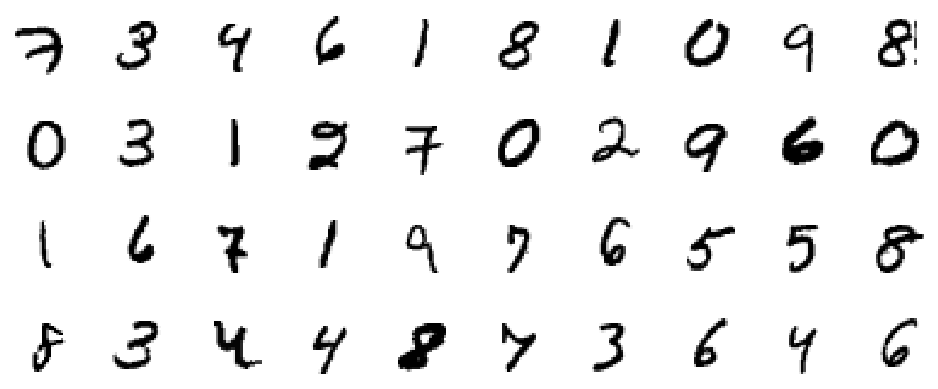

In [ ]:
# Die ersten 40 Bilder des Trainingssets in eine Grafik packen und ausgeben
#
# Mit Matplotlib wird eine Grafik erstellt (Grössenparameter etc mitgeben) mit Platz für 40 Bilder
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

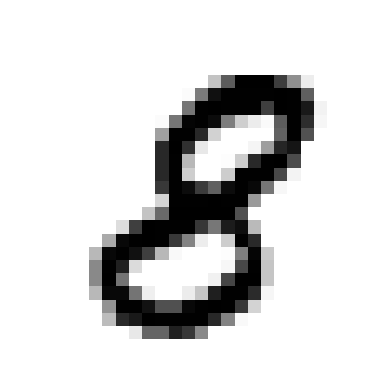

In [7]:
# Bild Nr 5 in schwarz weiss (binary) anzeigen
plt.imshow(X_train[5], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

### Create and train the model
Implement an ANN with 2 Hidden Layers, the first with 128 neurons and "relu" activation functions. The second layers instead contains 64 neurons (also relu activation function).
Don't forget the output layer :)

Also, remember that due to the 2D structure of your input data you need to first flatten them. Use the following specific layer at the very beginning inside your Sequential Model:


tf.keras.layers.Flatten(input_shape=(28, 28))

Notabene: you don't need to provide the input_dim in the first Dense layer, if you start with a Flatten layer.

In [ ]:
#TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
# Flatten -> 28*28 zu 784 Zahlen Vektor (kein input-dim mehr nötig)
# Dense -> jedes Neuron erhält alle Werte des Vektors, gewichtet sie (im Training) und bildet 1 neuen Wert und wendet darauf Aktivierungsfunktion an (128N -> neuer Vektor mit 128 Wert)
# Relu (Hidden Layer)= Alle irrelevanten Werte rausfiltern & auch Kurven etc in Bild erkennen
# Für Ausgabeschicht:
# Softmax = Vektor in Wahrscheinlichkeiten umwandeln (Klassifikation mehrerer Klassen)
# Sigmoid (für Binary) (activation="sigmoid")
# Linear für Regression (activation="linear")
# 
# Neues Modell wird erstellt und in model gespeichert
# Flatten: Bilder sind 28x28 gross wie man weiter oben beim Output von "X_train_full.shape" sieht. Das 1 steht für die Farbstufe (1=graustufenbild)
# Flatten formt das 3D Bild (28x28x1) in einen flachen Vektor mit 784 Werten um, da Neutonale Netzwerke eine Liste von Zahlen (Vektoren) und keine Matrix / Bildform brauchen.
# Da ich Flatten mache braucht es kein Input-dim mehr (wäre für angabe wieviele Zahlen im Vektor sind und das ist ja hier durch die Umwandlung in den Vektor bereits gegeben) 
# Vektor = Liste von Zahlen (meist Array) mit den Feature Werten (zb Grösse, Gewicht, Alter) oder bei einem 28*28*1 Bild halt die "Beschreibung" der 784 Pixel pro Bild
# Dense Schichten: Jedes Neuron kann etwas anderes Lernen zb. N1 erkennt Rundungen, N2 gerade Linien, N3 reagiert stark auf linke obere Ecken (128 Neuronen können 128 Muster glz erkennen)
# Dense: Hier wird eine Schicht mit zb 128 Neuronen erzeugt. Jedes Neuron berechnet einen Wert für das ganze Bild, indem es jeden einzelnen Pixelwert im Vektor mit einem Gewicht multipliziert
# Gewicht ist das was das NN im Training lernt und anpasst (zb. w1*x1 + w2*x2... wn*xn + b (bias) = z (wert des Neurons)). Das Ergebnis wird dann durch eine Aktivierungsfunktion geschickt.
# Aktivierungsfunktion wäre zb Sigmoid (z) bei logisitscher Regression (Workarround für Transformation zu 0-1)
# Relu filtert alle z Werte unter 0 raus bzw sie werden zu 0, da nicht relevant -> Mit Relu kann Netzwerk nicht lineare Muster erkennen (Kurven, Kreise etc)
# Softmax wandelt Vektor in Wahrscheinlichkeiten um (alle Zahlen im Vektor bekommen ihre prozentuale Wahrscheinlichkeit 0-1, Summe des Vektors = 1) dann kann man am Schluss zb Sagen Bild sieht
# 95% aus wie 7, 3 % wie 8, etc...
#
# Praxistipps:
# Tiefe Netzwereke (mehr Layer mit weniger Neuronen) oft schneller gutes Ergebnis da sie von vorheriger Schicht lernen
# Pyramidenform bei Neuronenzahl (64, 32, 16, Outputlayer 1 Neuron)
# Mit kleinen Netzen starten und bei Bedarf erhöhen (aber aufpassen Overfitting)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),#my figures have size 28 pixels x 28 pixels # Flatten is needed for img
  tf.keras.layers.Dense(128, activation="relu"), # Dense produces a fully conencted layer. #w/o Flatten, the input is given here
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")#we use softmax because we are dealing with a multi-class classification
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-15 14:47:10.329372: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Since my input are 2D images, I need first to "flatten" them into a 1-dimensional array. The number of input neurons will be the total number of pixels.

In [10]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Define now which cost function to minimize in the .compile method. Take "sgd" as optimizer and track the accuracy as metric.

For classification:Pay attention to the last layer if sigmoid or softmax is explicitly indicated, then from_logits = False

Notabene: Here a Sparse Categorical Crossentropy is used, becuase we are dealing with a multi-class classification If it would be a binary classification, then the loss function (i.e. the cost function) would have been Binary Crossentropy

For a full lists of cost functions available in tf.keras (both for Regression and Classification) https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [11]:
# TODO: Compile the model with appropriate loss, optimizer, and metrics (the choice of loss function depends on the problem you are facing)
# model.compile(...)


# loss... -> Wahl der Loss Function (die angiebt wie schlecht Vorhersage war) die beim Training minimiert werden soll:
# Multi-class: softmax + SparseCategoricalCrossentropy (loss="SparseCategoricalCrossentropy")
# Binary: sigmoid + BinaryCrossentropy (loss="BinaryCrossentropy")
# Regression: linear + MeanSquaredError (loss="MeanSquaredError")
# (from_logits=False) bei Klassifikation setzen wenn ich am Ende des NN schon Softmax (oder Sigmoid oä) verwende (true wäre wenn Rohe Ausgabe ohne den Outputlayer hätte)
# 
# Optimizer = Lernalogrithmus der die Gewichte im Modell anpasst (Backpropagation) und versucht Lossfunction zu minimieren
# Gradient Descent: .SGD() (Stochastic, berechnet Gewichtsupdate mit 1 Datenpunkt statt allen) (Zittrig, Problem mit lokalen Minima) -> Viel Kontrolle & gut bei grossen Datensätzen, klassische Variante
# Momentum: optimizer = tf.keras.optimizers.SGD(momentum=0.9) -> bei lokalen Minima (merkt sich Richtung und nimmt Schwung wie Ball im Tal)
# RMSProp: .RMSProp() Schaut wie stark sich die Gewichte ändern -> jedes Gewicht bekommt eigenen Lernrate (gut bei komplexen Problemen)
# Adam: .Adam() -> Kombi RMS & Momentum, sehr stabil
#
# Metrics = Metrik die zeigt wie gut Modell ist (für mich als Info, wird nicht zum lernen verwendet)
# 
# Multi-class: "accuracy" Wieviel % der Vorhersagen waren korrekt (nur bei balancierten Klassen, sonst wenn zb. 99% A hätte man 99% genau mit immer A nehmen)
#  | "sparse_categorical_accuracy" Accuracy speziell für integer Labels wie bei MNIST (zb 0-9) wenn SparseCategoricalCrossentropy als Loss.
# Binary: "binary_accuracy" (zb. Spam / not)
# One-hot-Labels: "categorical_accuracy"
# Regression: 	"tf.keras.metrics.MeanSquaredError()" -> Quadratischer Fehler – wird stärker bestraft bei großen Fehlern
#  | "...MeanAbsoluteError()" -> Durchschnittlicher Fehlerbetrag bei Regression (robust ggn Ausreiser)
# Sonstige Klassif: confusion_matrics | Precision wv predicted Positives sind Positiv (TP / (TP+FP)) zb für Spam (falsch Positive (also Mail das eig kein Spam) teuer)
# | Recall wv der tatsächlichen Positiven hat das Modell erkannt (TP / (TP+FN)) zb für Medizin, wenn keine positiven übersehen darf
# Sonstige Regression: R2 Anteil der erklärten Varianz, wie gut Modell im Vgl zu Random Modell 1 = perfekt 0 = Random
# | RMSE wenn Einheit gleich wie Zielgrösse (zb Meter, Temp etc)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [12]:
# TODO: Train the model using model.fit
# history = model.fit(...) # 1 epoch is a full pass over the whole training set, let's tray for 15 eopchs


# Epoch = Trainingsdurchläufe, Modell versucht bei jedem Durchlauf besser zu werden (aber zu viele = Overfitting)
# model.fit(...) trainiert das Modell mit den Trainingsdaten (passt Gewichte an) 
# misst die Leistung auf den Validierungsdaten
# Trainingsinfos werden in Variable history zur Analyse gespeichert
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))# 1 epoch is a full pass over the whole training set

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8690 - loss: 0.4501 - val_accuracy: 0.9594 - val_loss: 0.1263
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9662 - loss: 0.1090 - val_accuracy: 0.9714 - val_loss: 0.0962
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9784 - loss: 0.0696 - val_accuracy: 0.9756 - val_loss: 0.0818
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0569 - val_accuracy: 0.9762 - val_loss: 0.0758
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0396 - val_accuracy: 0.9764 - val_loss: 0.0801
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9758 - val_loss: 0.0838
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9913 - loss: 0.0259 - val_accuracy: 0.9760 - val_loss: 0.0920
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - loss: 0.0232 - 

In [13]:
# TODO: Evaluate the model on the test dataset
# model.evaluate(...)


# Modell wird auf Daten getestet die es bisher noch nie gesehen hat (Overfitting vermeiden)
# Loss und Accuracy werden ausgegeben
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.1214


[0.10176542401313782, 0.979200005531311]

Let's now predict the digits for the first 3 images in the test set. Feel free to check more cases.
First we predict the score associated which every category and then we find out which one is the one with highest score.

In [14]:

# In X_new werden die ersten 3 Bilder des Testdatensatzes gespeichert (Index 0-2) mit Slice [:3]
X_new = X_test[:3]
# Modell wird angewendendet auf die 3 Bilder und gibt Wahrscheinlichkeiten pro Zahl zurück (die erste sollte also eine 7 sein). Wahrsch werden in y_proba gespeichert.
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:

# np.argmax sucht in jeder Zeile (Bild) von y_proba (mit den Wahrsch das oben erstellt) nach der höchsten Wahrscheinlichkeit und speichert die Predictions in y_pred
y_pred=np.argmax(y_proba,axis=1)

# Bei Binary wären die Wahrscheinlichkeiten in y_proba einzelne Werte die einfach die Wahrscheinlichkeit für y = 1 angeben zb [0.82, 0.12, 0.57, 0.33]. Dann untigen Code nutzen der bei über 50 % als 1 klassifiziert
#
#if you are working with binary classification, use instead the following line:
#y_pred = (y_proba > 0.5).astype("int32")

y_pred

array([7, 2, 1])

Let's now visually check

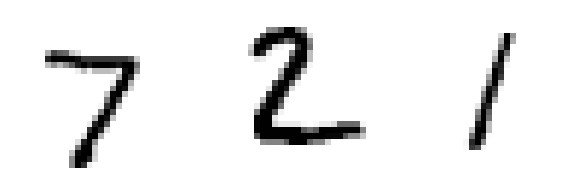

In [16]:
# neue Grafikerstellen (grösssenangaben in zoll 7.2x2.4)
plt.figure(figsize=(7.2, 2.4))
# Durch jedes Bild in X_new durchgehen. enumerate gibt Index und Bild zurück
for index, image in enumerate(X_new):
    # plt.subplot(Zeilen, Spalten, Position) 1 Zeile, die 3 Bilder (Spalten), Position +1 da Index vom 1. Bild = 0
    plt.subplot(1, 3, index + 1)
    # Bild anzeigen, cmpap binary = schwarz weiss, interpolation nearest = keine unschärfe beim zoomen durch interpolation (neue pixel erzeugen aus umgebenen?)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    # X Y Achsen ausblenden
    plt.axis('off')

# Horizontaler und Vertikaler Abstand zwischen den Bildern einfügen
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Experimental test

The final test consist in a "physical" test.
1) Draw on a piece of paper 1 single digit between 0 and 9.
2) Take a picture with your webcam of it
3) Test if the neural network can correctly identify also your handwriting


To do that you need to preprocess first your image and put it in the right format, by using the Keras function 'load_img'
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
ATTENTION: your image need to be resized in the same size that you used for training.... And pay attention to RGB images and grayscale!

In [17]:

######################
# img = keras.preprocessing.image.load_img(#ADD YOUR CODE)

# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
######################


# Bild in Projekt bringen: Links im Explorer wo auch Jupyter NB ist rechtsklick machen und "Hochladen"
#
# Target Size verkleinert bild auf 28x28 (weil modell so trainiert wurde) und color mode für Graustufen wie im Training
img = tf.keras.utils.load_img("test1.png", target_size=(28, 28), color_mode="grayscale")
# Bild in Zahlenarray (Pixelwerte) umwandeln (da Graustufen ist nur 0-255 kein rgb). Dann normalisieren (0-1) indem durch 255 teile
# 1-... Invertierung (umkehren) weil in MNIST die Bilder weiss auf schwarz sind
img_array = 1 - tf.keras.utils.img_to_array(img) / 255.0
# Hier wird jeder Pixel aus dem Bild geprüft ob dunkel genug um als Hintergrund zu gelten. Ergebnis ist ein Array mit True/false für jeden Pixel
background = img_array < 0.5
# Hier werden alle Pixel die kleiner als 0.5 (true) waren (also eher dunkel) auf 0 gesetzt (ganz schwarz) um rauschen zu reduzieren
img_array[background] = 0.0
# Tensor erwartet 4D (Anzahl Bilder, Höhe, Breite, Kanäle). Hier wird noch Dimension Anzahl Bilder mit neu dazugefügt. Daher 0, damit die Dimension an Stelle 0 im Array hinzugefügt wird 
# Restliche Infos sind bereits zuvor vorhanden.
img_array = tf.expand_dims(img_array, 0)





Now you can simply predict the class of your image, as done just before for the MNIST test images.


In [21]:

# Mein Bild wird an Modell übergeben und Wahrscheinlichkeiten pro Zahl berechnet
# Training = False sagt Modell dass Testmodus nicht train
# Predictions ist eine Variable vom Typ "Tensor" (Array das die Wahrscheinlichkeiten pro Zahl speichert)
predictions = model(img_array, training = False)
# Softmax weil Predictions Rohwerte (Logits sind) -> wandelt in Wahrscheinlichkeiten um
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
# Hier wird wieder höchste Wahrscheinlichkeit rausgefiltert und als Prozentzahl zurückgegebene
    .format(np.argmax(predictions,axis=1), 100 * np.max(score))
)
print(score)

This image most likely belongs to [5] with a 17.97 percent confidence.
tf.Tensor(
[0.09606291 0.08923025 0.0896784  0.09322233 0.08838073 0.17965549
 0.08886447 0.0908924  0.0956567  0.08835625], shape=(10,), dtype=float32)


Is the result correct?

### Plot the evolution of accuracy and loss
The historical values of accuracy and loss during training and validation are stored during training in the variable "history".
You can access them through history.history.
Use this information to plot and compare the evolution of accuracy and loss for training and validation. What can you learn from this?

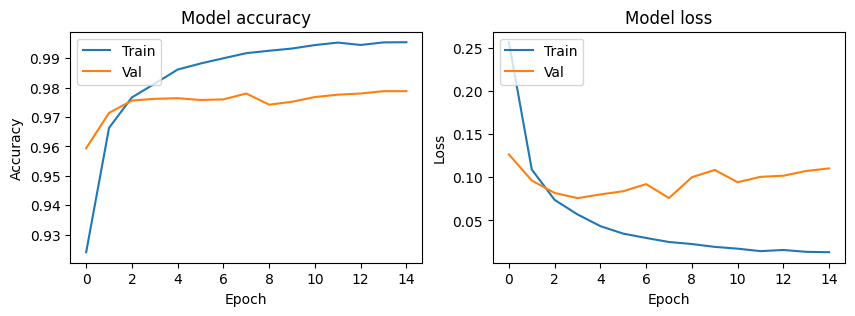

In [ ]:

# Overfitting (Variance) detected: Regularisierung (grosse Gewichtswerte bestrafen), kleineres Modell, mehr Daten
# Underfitting (bias): Komplexer (mehr Layer, Neuronen etc)
#
# Overfitting: (wenn zb Training Error 1% und Validation Error 12 % -> Varianz 11 %)
# Underfitting: wenn zb Training Error 16% und Val 17%
#
# Dropout: Zufälliges Abschalten von Neuronen während Training (wirkt wie Ensemble Training mit vielen kleinen Netzen)
# Early Stopping: Beendet das Training automatisch, wenn sich die Validierungsmetrik nicht weiter verbessert -> schnellere Trainzeit und weniger Overfitting
# Hier könnte man auch einige Epcoch früher stoppen. Beste Val. Leistung ca bei 7, zuvor schon immer mehr Overfitting und nur leichte Verbesserung bei Val


plt.figure(figsize=(10,3))
# Plot training & validation accuracy values
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()